In [1]:
from tensorflow import keras

In [2]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.2706 - accuracy: 0.5964 - val_loss: 0.8689 - val_accuracy: 0.7148
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7846 - accuracy: 0.7413 - val_loss: 0.6977 - val_accuracy: 0.7738
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6708 - accuracy: 0.7807 - val_loss: 0.6217 - val_accuracy: 0.8014
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6114 - accuracy: 0.7996 - val_loss: 0.5805 - val_accuracy: 0.8112
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5741 - accuracy: 0.8096 - val_loss: 0.5503 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5479 - accuracy: 0.8172 - val_loss: 0.5255 - val_accuracy: 0.8260
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5283 - accuracy: 0.8229 - val_loss: 0.5082 - val_accuracy:

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3519 - accuracy: 0.6058 - val_loss: 0.9156 - val_accuracy: 0.7268
Epoch 2/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.8150 - accuracy: 0.7433 - val_loss: 0.7234 - val_accuracy: 0.7688
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6889 - accuracy: 0.7799 - val_loss: 0.6377 - val_accuracy: 0.7964
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6248 - accuracy: 0.7996 - val_loss: 0.5878 - val_accuracy: 0.8150
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5838 - accuracy: 0.8107 - val_loss: 0.5598 - val_accuracy: 0.8176
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5557 - accuracy: 0.8180 - val_loss: 0.5333 - val_accuracy: 0.8290
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5337 - accuracy: 0.8231 - val_loss: 0.5182 - val_accuracy:

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

In [10]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [11]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 20s 11ms/step - loss: 1.0592 - accuracy: 0.6095 - val_loss: 0.6670 - val_accuracy: 0.7656
Epoch 2/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.6575 - accuracy: 0.7694 - val_loss: 0.8320 - val_accuracy: 0.7020
Epoch 3/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.6383 - accuracy: 0.7738 - val_loss: 0.5438 - val_accuracy: 0.8044
Epoch 4/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5328 - accuracy: 0.8129 - val_loss: 0.5258 - val_accuracy: 0.8148
Epoch 5/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4966 - accuracy: 0.8260 - val_loss: 0.5405 - val_accuracy: 0.8018
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4731 - accuracy: 0.8344 - val_loss: 0.4847 - val_accuracy: 0.8334
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4373 - accuracy: 0.8489 - val_loss: 0.4414 -

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_107 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_108 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [14]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8958 - accuracy: 0.6976 - val_loss: 0.5985 - val_accuracy: 0.8014
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6033 - accuracy: 0.7932 - val_loss: 0.5192 - val_accuracy: 0.8252
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5441 - accuracy: 0.8125 - val_loss: 0.4808 - val_accuracy: 0.8392
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5124 - accuracy: 0.8228 - val_loss: 0.4594 - val_accuracy: 0.8432
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4903 - accuracy: 0.8307 - val_loss: 0.4432 - val_accuracy: 0.8504
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4736 - accuracy: 0.8351 - val_loss: 0.4322 - val_accuracy: 0.8530
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4602 - accuracy: 0.8392 - val_loss: 0.4229 - val_accuracy:

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8715 - accuracy: 0.7125 - val_loss: 0.5979 - val_accuracy: 0.8052
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6038 - accuracy: 0.7935 - val_loss: 0.5210 - val_accuracy: 0.8272
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5484 - accuracy: 0.8126 - val_loss: 0.4850 - val_accuracy: 0.8372
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5189 - accuracy: 0.8207 - val_loss: 0.4626 - val_accuracy: 0.8432
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4945 - accuracy: 0.8281 - val_loss: 0.4458 - val_accuracy: 0.8498
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4804 - accuracy: 0.8327 - val_loss: 0.4341 - val_accuracy: 0.8536
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4685 - accuracy: 0.8372 - val_loss: 0.4254 - val_accuracy:

In [17]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer = keras.optimizers.SGD(clipnorm=1.0)

In [18]:
import numpy as np

def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [19]:
X_train_A.shape

(43986, 28, 28)

In [20]:
X_train_B.shape

(200, 28, 28)

In [21]:
y_train_B

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.], dtype=float32)

In [22]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5599 - accuracy: 0.8182 - val_loss: 0.3754 - val_accuracy: 0.8759
Epoch 2/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3589 - accuracy: 0.8761 - val_loss: 0.3230 - val_accuracy: 0.8941
Epoch 3/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3221 - accuracy: 0.8873 - val_loss: 0.2985 - val_accuracy: 0.9003
Epoch 4/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3019 - accuracy: 0.8953 - val_loss: 0.2835 - val_accuracy: 0.9038
Epoch 5/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2882 - accuracy: 0.9009 - val_loss: 0.2778 - val_accuracy: 0.9086
Epoch 6/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2779 - accuracy: 0.9044 - val_loss: 0.2633 - val_accuracy: 0.9141
Epoch 7/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2696 - accuracy: 0.9082 - val_loss: 0.2582 - val_accuracy:

In [23]:
model_A.save("my_model_A.h5")

In [24]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 28ms/step - loss: 0.6818 - accuracy: 0.6200 - val_loss: 0.5123 - val_accuracy: 0.7363
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.4955 - accuracy: 0.7400 - val_loss: 0.3949 - val_accuracy: 0.8540
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 0.3804 - accuracy: 0.8600 - val_loss: 0.3238 - val_accuracy: 0.9077
Epoch 4/20
7/7 [==============================] - 0s 9ms/step - loss: 0.3064 - accuracy: 0.9050 - val_loss: 0.2705 - val_accuracy: 0.9249
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 0.2568 - accuracy: 0.9200 - val_loss: 0.2366 - val_accuracy: 0.9422
Epoch 6/20
7/7 [==============================] - 0s 9ms/step - loss: 0.2204 - accuracy: 0.9350 - val_loss: 0.2106 - val_accuracy: 0.9513
Epoch 7/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1927 - accuracy: 0.9600 - val_loss: 0.1915 - val_accuracy: 0.9604
Epoch 8/20
7/7 [=================

In [25]:
model_A.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_113 (Dense)           (None, 300)               235500    
                                                                 
 dense_114 (Dense)           (None, 100)               30100     
                                                                 
 dense_115 (Dense)           (None, 50)                5050      
                                                                 
 dense_116 (Dense)           (None, 50)                2550      
                                                                 
 dense_117 (Dense)           (None, 50)                2550      
                                                                 
 dense_118 (Dense)           (None, 8)                

In [26]:
model_B.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_119 (Dense)           (None, 300)               235500    
                                                                 
 dense_120 (Dense)           (None, 100)               30100     
                                                                 
 dense_121 (Dense)           (None, 50)                5050      
                                                                 
 dense_122 (Dense)           (None, 50)                2550      
                                                                 
 dense_123 (Dense)           (None, 50)                2550      
                                                                 
 dense_124 (Dense)           (None, 1)                

In [27]:
model_A = keras.models.load_model("my_model_A.h5")
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [28]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 26ms/step - loss: 0.8119 - accuracy: 0.4800 - val_loss: 0.7361 - val_accuracy: 0.5355
Epoch 2/4
7/7 [==============================] - 0s 9ms/step - loss: 0.7402 - accuracy: 0.5150 - val_loss: 0.6742 - val_accuracy: 0.5659
Epoch 3/4
7/7 [==============================] - 0s 9ms/step - loss: 0.6763 - accuracy: 0.5600 - val_loss: 0.6206 - val_accuracy: 0.6166
Epoch 4/4
7/7 [==============================] - 0s 9ms/step - loss: 0.6207 - accuracy: 0.6100 - val_loss: 0.5719 - val_accuracy: 0.6663


In [29]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 0s 27ms/step - loss: 0.5010 - accuracy: 0.7100 - val_loss: 0.3885 - val_accuracy: 0.8448
Epoch 2/16
7/7 [==============================] - 0s 9ms/step - loss: 0.3400 - accuracy: 0.9000 - val_loss: 0.2860 - val_accuracy: 0.9391
Epoch 3/16
7/7 [==============================] - 0s 10ms/step - loss: 0.2482 - accuracy: 0.9850 - val_loss: 0.2244 - val_accuracy: 0.9696
Epoch 4/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1921 - accuracy: 1.0000 - val_loss: 0.1868 - val_accuracy: 0.9787
Epoch 5/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1573 - accuracy: 1.0000 - val_loss: 0.1595 - val_accuracy: 0.9858
Epoch 6/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1321 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9878
Epoch 7/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1153 - accuracy: 1.0000 - val_loss: 0.1264 - val_accuracy: 0.9878
Epoch 8/16
7/7 [================

In [30]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9945


[0.07001140713691711, 0.9944999814033508]

In [31]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9820


[0.088573157787323, 0.9819999933242798]

In [32]:
# 모멘텀 옵티마이저
keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# 네스테로프 가속 경사
keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# AdaGrad
keras.optimizers.Adagrad(learning_rate=0.001)

# RMSProp
keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# Adam
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# AdaMax
keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Nadam
keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01, decay=1e-4), metrics=["accuracy"])

epoch = 25
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4920 - accuracy: 0.8272 - val_loss: 0.4100 - val_accuracy: 0.8572
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3804 - accuracy: 0.8641 - val_loss: 0.3760 - val_accuracy: 0.8702
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3466 - accuracy: 0.8770 - val_loss: 0.3650 - val_accuracy: 0.8732
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3255 - accuracy: 0.8840 - val_loss: 0.3539 - val_accuracy: 0.8782
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3103 - accuracy: 0.8895 - val_loss: 0.3435 - val_accuracy: 0.8794
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2969 - accuracy: 0.8939 - val_loss: 0.3422 - val_accuracy: 0.8810
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2866 - accuracy: 0.8984 - val_loss: 0.3379 - val_accuracy:

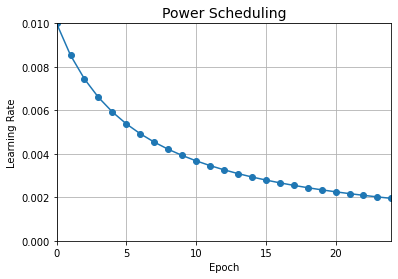

In [35]:
import math
import matplotlib.pyplot as plt

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(epoch)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, epoch - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [36]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [37]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

epoch = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8535 - accuracy: 0.7556 - val_loss: 0.6488 - val_accuracy: 0.8122 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7527 - accuracy: 0.7768 - val_loss: 0.7816 - val_accuracy: 0.7628 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6199 - accuracy: 0.8079 - val_loss: 0.6512 - val_accuracy: 0.8370 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5643 - accuracy: 0.8296 - val_loss: 0.6209 - val_accuracy: 0.8330 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5320 - accuracy: 0.8362 - val_loss: 0.6069 - val_accuracy: 0.8226 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4725 - accuracy: 0.8530 - val_loss: 0.5369 - val_accuracy: 0.8414 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 5s

In [38]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [39]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

epoch = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9124 - accuracy: 0.7399 - val_loss: 1.4577 - val_accuracy: 0.7032 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1108 - accuracy: 0.6307 - val_loss: 1.1227 - val_accuracy: 0.6430 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1524 - accuracy: 0.5762 - val_loss: 1.2124 - val_accuracy: 0.5652 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1639 - accuracy: 0.5707 - val_loss: 1.1625 - val_accuracy: 0.5414 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0727 - accuracy: 0.5862 - val_loss: 1.0632 - val_accuracy: 0.5930 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9084 - accuracy: 0.6165 - val_loss: 0.9741 - val_accuracy: 0.6054 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 5s

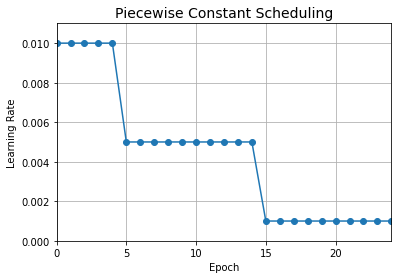

In [41]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, epoch - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

epoch = 25
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5911 - accuracy: 0.8049 - val_loss: 0.5527 - val_accuracy: 0.8318 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5210 - accuracy: 0.8356 - val_loss: 0.4839 - val_accuracy: 0.8394 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4990 - accuracy: 0.8434 - val_loss: 0.5482 - val_accuracy: 0.8174 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5105 - accuracy: 0.8480 - val_loss: 0.5411 - val_accuracy: 0.8522 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5439 - accuracy: 0.8468 - val_loss: 0.5791 - val_accuracy: 0.8542 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5307 - accuracy: 0.8516 - val_loss: 0.6684 - val_accuracy: 0.8450 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 3s

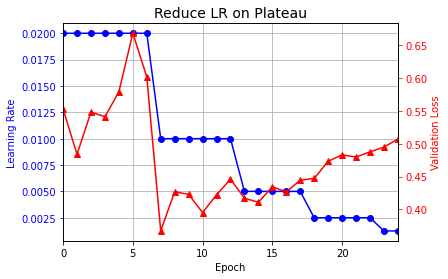

In [43]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, epoch - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

s = 20 * len(X_train) // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

epoch = 25
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4884 - accuracy: 0.8282 - val_loss: 0.4118 - val_accuracy: 0.8564
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3819 - accuracy: 0.8647 - val_loss: 0.3849 - val_accuracy: 0.8672
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3486 - accuracy: 0.8765 - val_loss: 0.3696 - val_accuracy: 0.8676
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3278 - accuracy: 0.8833 - val_loss: 0.3549 - val_accuracy: 0.8736
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3101 - accuracy: 0.8893 - val_loss: 0.3435 - val_accuracy: 0.8822
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2971 - accuracy: 0.8949 - val_loss: 0.3397 - val_accuracy: 0.8814
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2863 - accuracy: 0.8979 - val_loss: 0.3353 - val_accuracy:

In [45]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch], values=[0.01, 0.005, 0.001])

In [49]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [50]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

430/430 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.3861


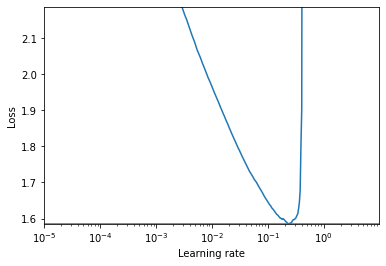

In [51]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [52]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [53]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 3ms/step - loss: 0.6493 - accuracy: 0.7756 - val_loss: 0.4854 - val_accuracy: 0.8382
Epoch 2/25
430/430 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.8388 - val_loss: 0.4411 - val_accuracy: 0.8488
Epoch 3/25
430/430 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.8538 - val_loss: 0.4161 - val_accuracy: 0.8596
Epoch 4/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.8643 - val_loss: 0.4092 - val_accuracy: 0.8576
Epoch 5/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.8700 - val_loss: 0.3907 - val_accuracy: 0.8634
Epoch 6/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3461 - accuracy: 0.8759 - val_loss: 0.3669 - val_accuracy: 0.8746
Epoch 7/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8810 - val_loss: 0.3707 - val_accuracy: 0.8742
Epoch 